# Draft code for homework 2
...because it's easier to mess around in a Jupyter notebook than in a python script!

Note: all images in this script are assumed to be in grayscale; this is true for the Yale images used in this assignment.

In [2]:
import cv2 
import math
import os

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


Note that the data for the Yale faces datasets can be found on the course website in the "Homework + Data + Text" section: https://faculty.washington.edu/kutz/am584/am584.html. 
        

In [3]:
main_dir = '/Users/jmnugent/Documents/__Year_3_2020-2021/AMATH_584-Numerical_Linear_Algebra/Homework/python/'

crop_dir = main_dir + 'CroppedYale/'
uncrop_dir = main_dir + 'yalefaces_uncropped/yalefaces/'
save_dir = main_dir + 'amath584/hw2_SVD_facial_recognition/'


## Read in the data:
##### Get the data matrices for all images within each subject's subfolder and average them

### Cropped:

In [4]:
# get a list of paths to each subfolder in CroppedYale
paths = [crop_dir + dirname for dirname in os.listdir(crop_dir)
         if os.path.isdir(os.path.join(crop_dir, dirname))]

# initialize list to hold the averaged data matrices for each image
n_img = len(paths)
cropped_pics = [[]]*n_img

for i in range(n_img):
    # get the list of file names within the subfolder for that image
    subfolder = paths[i] + '/'
    imagenames = [subfolder + f for f in os.listdir(subfolder)
                  if os.path.isfile(os.path.join(subfolder, f))]
    
    # make one list containing the data matrices for each (grayscale) image 
    images = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2GRAY) for x in imagenames]

    # averaged the data matrix for this image and add to the list
    cropped_pics[i] = np.mean(images, axis=0)
    

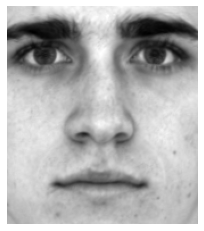

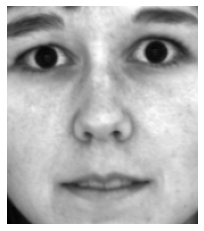

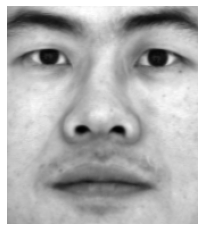

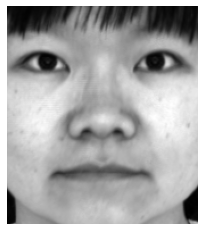

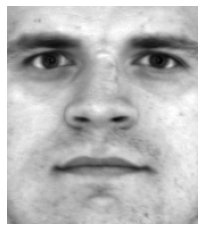

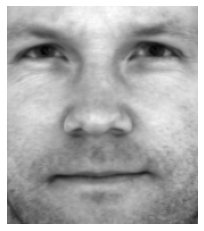

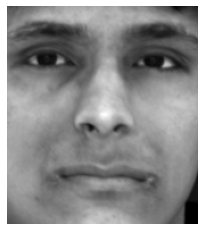

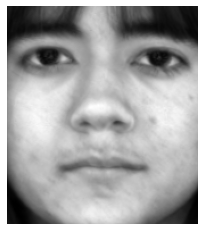

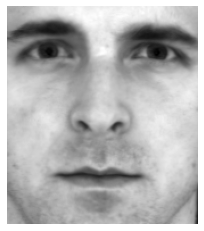

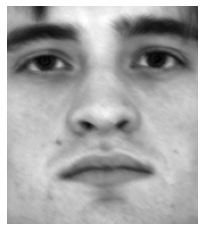

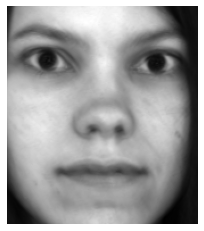

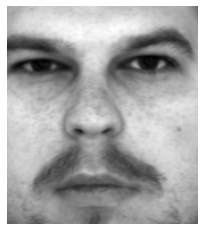

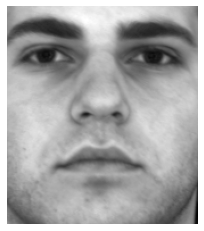

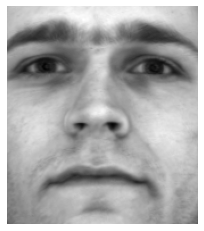

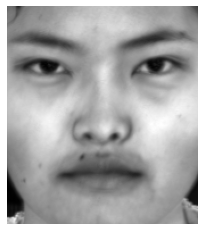

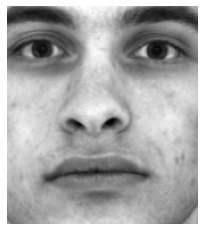

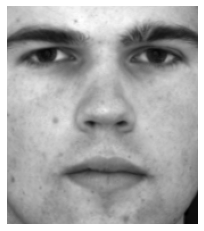

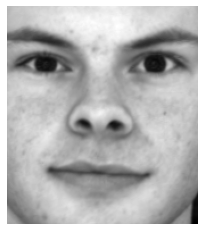

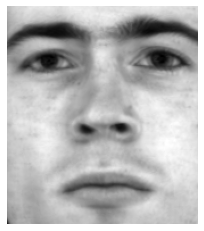

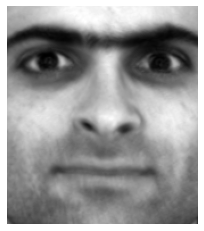

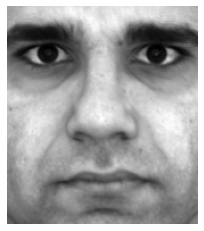

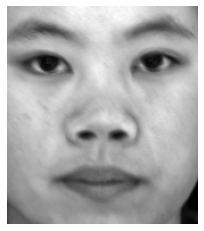

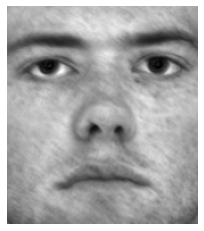

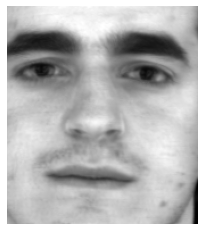

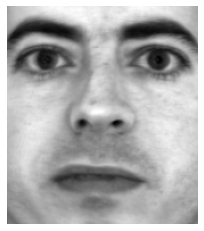

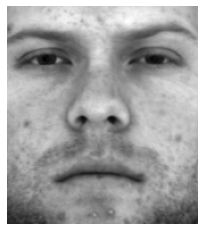

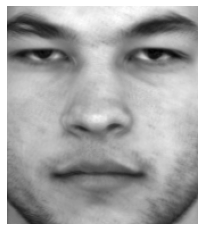

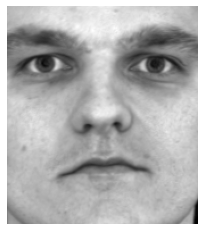

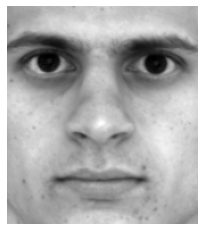

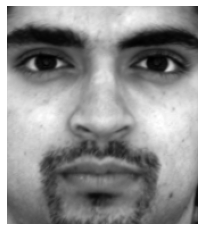

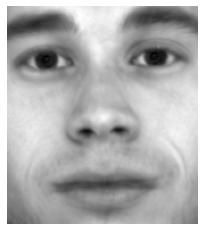

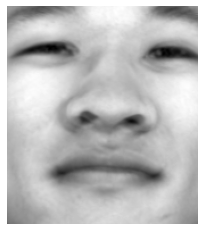

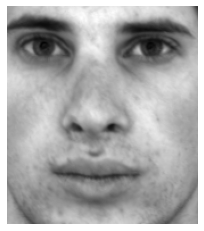

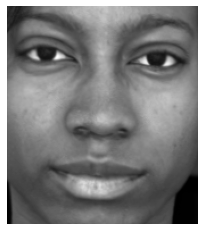

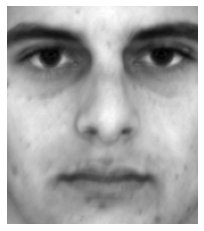

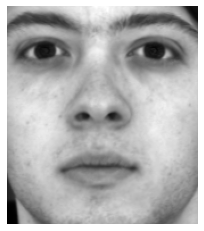

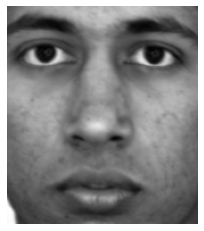

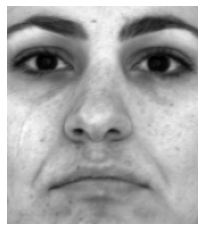

In [4]:
# test it!

for i in range(len(cropped_pics)):
    plt.imshow(cropped_pics[i], cmap='gray')
    plt.axis('off')
    plt.show()


### Uncropped:
Note that the uncropped images are gif files, so we cannot read them in with cv2 as before; instead, we use pillow (PIL). 

In [5]:
# get a list of paths to each subfolder in yalefaces_uncropped
unpaths = sorted([uncrop_dir + name for name in os.listdir(uncrop_dir)])

# check that each subject has 11 images in the dataset
if len(unpaths) % 11 == 0:
    n_sub = int(len(unpaths) / 11)
else:
    raise Exception('Invalid number of images! Each subject should have exactly 11 images.')

# initialize list to hold the averaged data matrices for each subject
uncropped_pics = [[]]*n_sub

for i in range(n_sub):
    # make one list containing the data matrices of the 11 images for that subject
    images_uc = [np.array(Image.open(x).convert('L')) for x in unpaths[i*11:(i+1)*11]]

    # averaged the data matrix for this image and add to the list
    uncropped_pics[i] = np.mean(images_uc, axis=0)


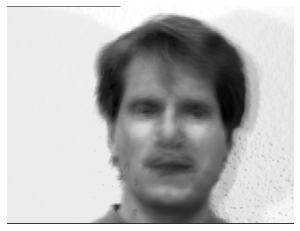

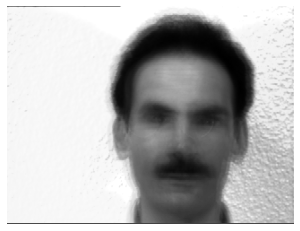

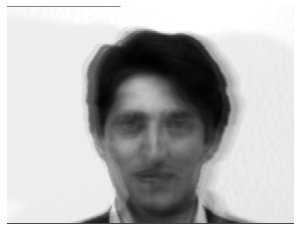

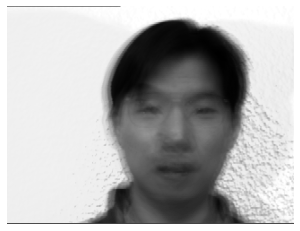

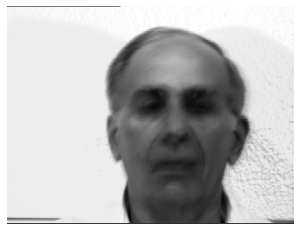

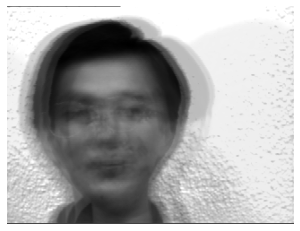

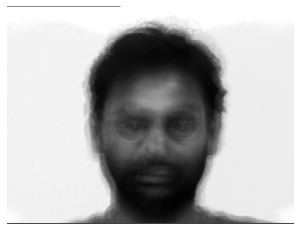

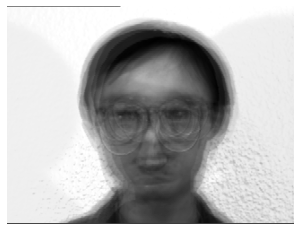

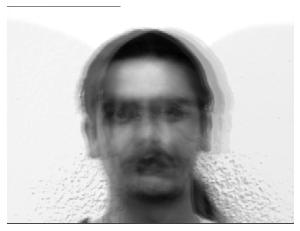

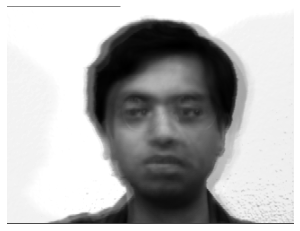

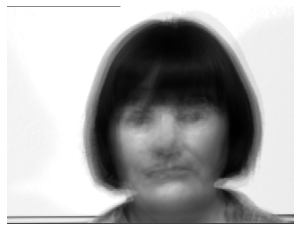

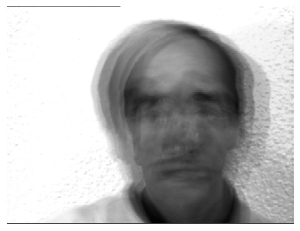

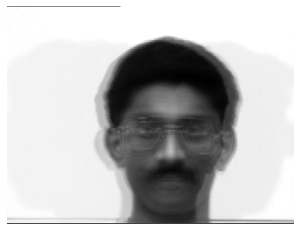

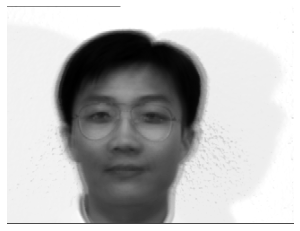

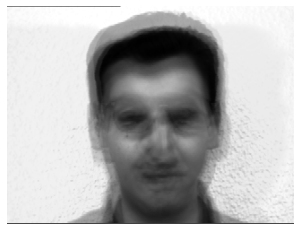

In [6]:
# test it!

for i in range(len(uncropped_pics)):
    plt.imshow(uncropped_pics[i], cmap='gray')
    plt.axis('off')
    plt.show()


## 1. Do an SVD analysis of the images
(where each image is reshaped into a column vector and each column is a new image).

In [26]:
# stack so each (averaged) image is one column in the data matrix
A = np.transpose(np.asarray([x.flatten() for x in cropped_pics])) # stack so each image is one column

# correlation matrix
C = np.matmul(np.transpose(A), A)

# perform (economy) SVD
[Uhat, Shat, VThat] = np.linalg.svd(A, full_matrices=False)


In [27]:
# check that the dimensions are correct

print(A.shape, Uhat.shape, Shat.shape, VThat.shape)


(32256, 38) (32256, 38) (38,) (38, 38)


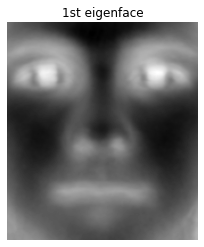

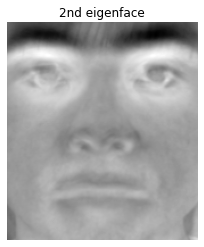

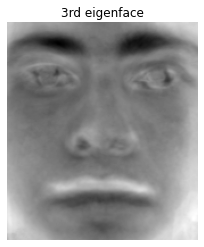

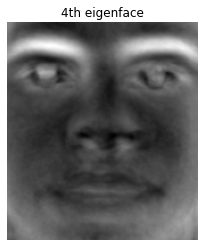

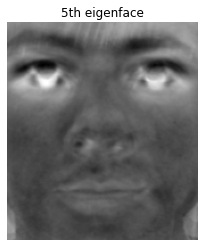

In [28]:
# choose how many eigenfaces to plot
n = 5 

for i in range(n):
    
    plt.imshow(np.reshape(Uhat[:, i], cropped_pics[0].shape), cmap='gray')
    if i == 0:
        lab = '1st'
    elif i == 1:
        lab = '2nd'
    elif i == 2:
        lab = '3rd'
    else:
        lab = '{}th'.format(i+1)
    plt.title(lab + ' eigenface')
    plt.axis('off')
    
    plt.show()


### Cropped

#### subtract average first?

In [ ]:
# the average face:

avg_face = np.mean(cropped_pics, axis=0)

plt.imshow(avg_face, cmap='gray')
plt.show()


In [ ]:
# subtract each face from average????

X = np.asarray([x.flatten() for x in cropped_pics]) # stacked avg pics of each person
Atest = X - (np.ones((38, 32256))*avg_face.flatten()) # subtract avg face from each person

# SVD on average-subtracted?
[Utest, Stest, VTtest] = np.linalg.svd(Atest, full_matrices=False)


In [ ]:
# look at the average of pics for one person vs. their averaged pics - the mean face

for i in range(len(cropped_pics)):
    one_person = np.reshape(Atest[i, :], cropped_pics[i].shape)

    fig = plt.figure()
    
    ax1 = fig.add_subplot(121)
    ax1.imshow(cropped_pics[i], cmap='gray')
    ax1.set_title('person index {a} (#{b})\n(average over all of their pics)'.format(a=i, b=i+1))
    plt.axis('off')

    ax2 = fig.add_subplot(122)
    ax2.imshow(one_person, cmap='gray')
    ax2.set_title('person index {a} (#{b}),\nminus avg face'.format(a=i, b=i+1))
    plt.axis('off')
    
    plt.show()


In [ ]:
# test plot of singular values

plt.scatter(np.arange(1, len(Stest)+1), Stest)

plt.yscale('log')
plt.xlim([0, len(Stest)+1])
plt.ylim(5e2, 1e5)

plt.xticks(np.arange(0, len(Stest))[::5])

plt.title('Singular Values for average-subtracted Cropped Images')

plt.show()


#### don't subtract average first

In [ ]:
%%time
# (economy) SVD analysis on the averaged matrices

A = np.asarray([x.flatten() for x in cropped_pics])
C = np.matmul(A, np.transpose(A))

[Uhat, Shat, VThat] = np.linalg.svd(A, full_matrices=False)


In [ ]:
# do all matrices have the expected shapes? (yes!)

print(A.shape, Uhat.shape, Shat.shape, VThat.shape)


In [ ]:
# look at the singular values 

print(Shat)

In [ ]:
# test plot of singular values

plt.scatter(np.arange(1, len(Shat)+1), Shat)

plt.yscale('log')
plt.xlim([0, len(Shat)+1])
plt.ylim(5e2, 1e5)

plt.xticks(np.arange(0, len(Shat))[::5])

plt.title('Singular Values for Cropped Images')

plt.show()


In [ ]:
# ...not sure what this is doing...

proj = np.matmul(np.transpose(A[:, 4000]), VThat)
test = np.reshape(proj, cropped_pics[0].shape)

plt.imshow(test, cmap='gray')
plt.show()


### Uncropped

## 2. What is the interpretation of the U, Σ and V matrices?
(Plot the first few reshaped columns of U)

# COME BACK HERE!
I need to review what these mean/which plots will be meaningful...

In [ ]:
proj = [np.matmul(U[i, :], VT[i, :]) for i in range(len(S))]
plt.bar(np.arange(0, len(S)), proj)
plt.show()

# each of these bars indicates ...?

In [ ]:
plt.bar(np.arange(len(S)), U[:, 0], label='1st col', alpha=0.6, color='r')
plt.bar(np.arange(len(S)), U[:, 1], label='2nd col', alpha=0.6, color='y')
plt.bar(np.arange(len(S)), U[:, 2], label='3rd col', alpha=0.6, color='b')

plt.xlabel('image/subject number')
plt.ylim(-0.6, 0.6)
plt.ylabel('projection of that eigenvector\nonto each subject (??)')
plt.legend()

plt.show()


## 3. What does the singular value spectrum look like and how many modes are necessary for good image reconstructions using the PCA basis?
(i.e. what is the rank r of the face space?)

## 4. Compare the difference between the cropped (and aligned) versus uncropped images in terms of singular value decay and reconstruction capabilities.